In [40]:
import pandas as pd

df = pd.read_csv("../data/sc-est2019-alldata5.csv")

In [41]:
sex_dict = {
    0: "total",
    1: "male",
    2: "female",
}

def RACE(x):
    if x["ORIGIN"] == 2:
        return "hispanic/latino"
    if x["RACE"] == 1:
        return "white"
    if x["RACE"] == 2:
        return "black"
    return "other/mixed"

def AGE(x):
    if x < 18:
        return "12-17 Years Old"
    if x < 26:
        return "18-25 Years Old"
    if x < 35:
        return "26-34 Years Old"
    if x < 50:
        return "35-49 Years Old"
    return "50 or Older"

df = df[df.ORIGIN != 0]
df.SEX = df.SEX.map(sex_dict)
df.RACE = df.apply(RACE, axis=1)
df = df[df.SEX != "total"]
df = df[df.AGE >= 12]
df.AGE = df.AGE.map(AGE)

In [47]:
df.groupby(["SEX", "RACE", "AGE"])["POPESTIMATE2019"].sum() / df["POPESTIMATE2019"].sum()

SEX     RACE             AGE            
female  black            12-17 Years Old    0.006746
                         18-25 Years Old    0.009437
                         26-34 Years Old    0.010936
                         35-49 Years Old    0.015099
                         50 or Older        0.024938
        hispanic/latino  12-17 Years Old    0.011095
                         18-25 Years Old    0.013826
                         26-34 Years Old    0.014664
                         35-49 Years Old    0.021813
                         50 or Older        0.024392
        other/mixed      12-17 Years Old    0.003732
                         18-25 Years Old    0.005353
                         26-34 Years Old    0.007258
                         35-49 Years Old    0.010838
                         50 or Older        0.014968
        white            12-17 Years Old    0.023375
                         18-25 Years Old    0.033083
                         26-34 Years Old    0.040310
     

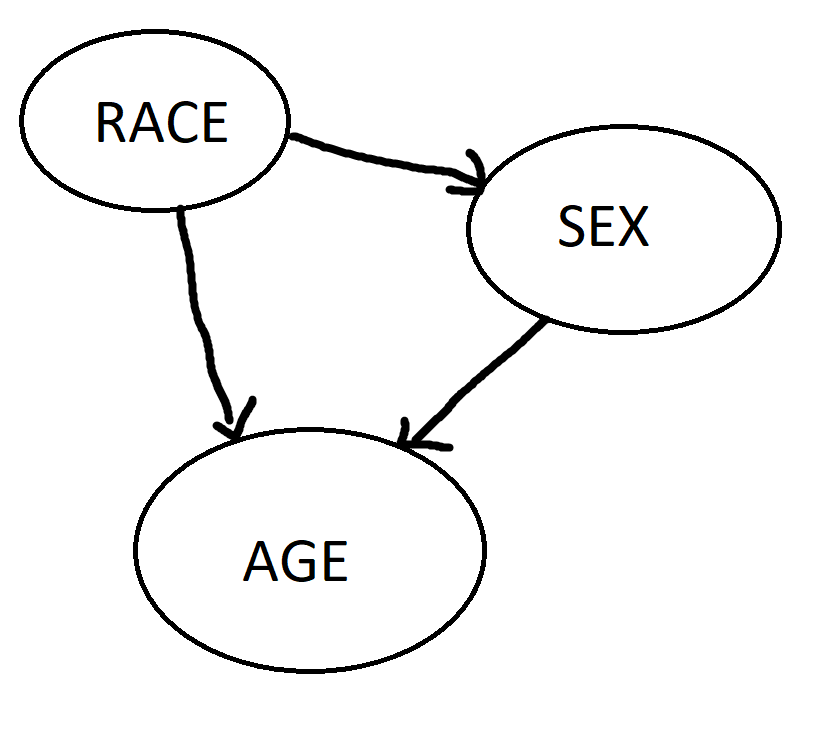

In [67]:
def get_cpd(data, child, parents, pop_col):
    if parents:
        return (data.groupby([*parents, child])["POPESTIMATE2019"].sum() / data.groupby([*parents])["POPESTIMATE2019"].sum()).to_xarray().values
    else:
        return (data.groupby([*parents, child])["POPESTIMATE2019"].sum() / data["POPESTIMATE2019"].sum()).values

get_cpd(df, "RACE", [], "POPESTIMATE2019")
get_cpd(df, "SEX", ["RACE"], "POPESTIMATE2019")
get_cpd(df, "AGE", ["RACE", "SEX"], "POPESTIMATE2019")

array([0.12741285, 0.17266528, 0.08047584, 0.61944604])

In [46]:
df.groupby(["RACE"])["POPESTIMATE2019"].sum() / df.["POPESTIMATE2019"].sum()

RACE
black              0.127413
hispanic/latino    0.172665
other/mixed        0.080476
white              0.619446
Name: POPESTIMATE2019, dtype: float64

In [ ]:
df.groupby(["SEX"])["POPESTIMATE2019"].sum() / df["POPESTIMATE2019"].sum()